# **PartB  1+2**

In this section, we load the dataset hotels_data.csv using pandas and display the first few rows to understand its structure. This step allows us to inspect the available columns and their data types before proceeding with further analysis and preprocessing.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
df = pd.read_csv("hotels_data.csv")
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


 Step **1a**: Calculating DayDiff
This step answers Section 1.a from the project instructions.
We calculate the number of days between Snapshot Date and Checkin Date to analyze pricing trends.

In [2]:
from datetime import datetime
from dateutil.parser import parse

def get_datetime(date_str):
    return datetime.strptime(date_str, '%m/%d/%Y %H:%M')

df["DayDiff"] = DataFrame([get_datetime(val) for val in df["Checkin Date"]]) - DataFrame([get_datetime(val) for val in df["Snapshot Date"]])
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days


Step **1b**: Calculating WeekDay
This step answers Section 1.b from the project instructions.
We extract the day of the week from Checkin Date to analyze how booking patterns vary by weekdays.

In [3]:
df["WeekDay"] = DataFrame([get_datetime(val).weekday() for val in df["Checkin Date"]])
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2


Step **1c**: Calculating DiscountDiff
This step answers Section 1.c from the project instructions.
We calculate the absolute discount amount by subtracting the Discount Price from the Original Price.

In [4]:
df["DiscountDiff"] = df["Original Price"] - df["Discount Price"]
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2,138
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2,131
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3,130
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6,72
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2,67


 Step **1d**: Calculating DiscountPerc
This step answers Section 1.d from the project instructions.
We compute the percentage discount by dividing DiscountDiff by Original Price and multiplying by 100.

In [5]:
df["DiscountPerc"] = (df["DiscountDiff"]/df["Original Price"]) * 100
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26 days,2,138,11.714771
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33 days,2,131,11.769991
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27 days,3,130,2.974828
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9 days,6,72,4.140311
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26 days,2,67,3.852789


In [6]:
df.to_csv("Hotels_data_Changed.csv")


# **Part 2 - Classification: Predicting the Best Discount Code**

 **Filtering Relevant Features**:
This step is part of Feature Selection for classification.
We filter the dataset to keep only relevant columns needed for training the model.

In [7]:
filtered_df = df.filter(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay", "Discount Code","Available Rooms","Hotel Stars","DiscountPerc","DiscountDiff"], axis=1)
filtered_df.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code,Available Rooms,Hotel Stars,DiscountPerc,DiscountDiff
0,Best Western Plus Seaport Inn Downtown,26 days,8/12/2015 0:00,7/17/2015 0:00,2,1,6,3,11.714771,138
1,Best Western Plus Seaport Inn Downtown,33 days,8/19/2015 0:00,7/17/2015 0:00,2,1,8,3,11.769991,131
2,The Peninsula New York,27 days,8/13/2015 0:00,7/17/2015 0:00,3,1,3,5,2.974828,130
3,Eventi Hotel a Kimpton Hotel,9 days,7/26/2015 0:00,7/17/2015 0:00,6,1,18,4,4.140311,72
4,Eventi Hotel a Kimpton Hotel,26 days,8/12/2015 0:00,7/17/2015 0:00,2,1,3,4,3.852789,67


**Filtering the Best Discount Code Per Group**:
This step ensures we select the best discount offer for each hotel entry.

 Grouping by key parameters.
 Finding the max discount (MaxDis) within each group.
Applying a threshold (0.95) to allow some flexibility in discount selection.
Dropping duplicates to keep only the best offers.
 **Saving the cleaned dataset as Hotels_data_for_best_discount_code_grouped.csv.**

In [8]:
filtered_df["MaxDis"] = filtered_df.groupby(["Hotel Name", "DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])["DiscountDiff"].transform('max')

threshold = 0.95
grouped_df = filtered_df[filtered_df["DiscountDiff"] >= filtered_df["MaxDis"] * threshold].drop_duplicates(
    ["Hotel Name", "DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"]
)

grouped_df.drop(labels=["MaxDis"], axis=1, inplace=True)

print("Before filtering:", filtered_df.shape)
print("After filtering:", grouped_df.shape)

grouped_df.to_csv("Hotels_data_for_best_discount_code_grouped.csv", index=False)
pred_df = grouped_df.copy()
pred_df.head()

Before filtering: (187848, 11)
After filtering: (107299, 10)


,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code,Available Rooms,Hotel Stars,DiscountPerc,DiscountDiff
0,Best Western Plus Seaport Inn Downtown,26 days,8/12/2015 0:00,7/17/2015 0:00,2,1,6,3,11.714771,138
1,Best Western Plus Seaport Inn Downtown,33 days,8/19/2015 0:00,7/17/2015 0:00,2,1,8,3,11.769991,131
3,Eventi Hotel a Kimpton Hotel,9 days,7/26/2015 0:00,7/17/2015 0:00,6,1,18,4,4.140311,72
5,Grand Hyatt New York,21 days,8/7/2015 0:00,7/17/2015 0:00,4,1,9,4,6.337047,91
6,Grand Hyatt New York,23 days,8/9/2015 0:00,7/17/2015 0:00,6,1,5,4,5.631188,91


**Data Preprocessing & Class Balancing**
This step ensures that the dataset is properly prepared for classification.


1.Encoding Categorical Variables

LabelEncoder is used to convert Checkin Date, Hotel Name, and Snapshot Date into numerical values.
DayDiff is transformed from timedelta to integer days.

2 . Dropping Unused Columns

Discount Code, Checkin Date, Snapshot Date, and Hotel Name are removed after encoding.                                                                        
Outcome: Cleaned & encoded dataset ready for classification models

In [9]:
from sklearn.preprocessing import LabelEncoder


Class1=pred_df.copy();

pred_df=Class1.copy()

pred_categorized_df=Class1.copy()

le=LabelEncoder()

pred_categorized_df["CheckinDate"]=le.fit_transform(pred_categorized_df["Checkin Date"])
pred_categorized_df["HotelName"]=le.fit_transform(pred_categorized_df["Hotel Name"])
pred_categorized_df["SnapshotDate"]=le.fit_transform(pred_categorized_df["Snapshot Date"])
pred_categorized_df["DayDiff"] = [t.days for t in pred_categorized_df["DayDiff"]]

pred_categorized_df.drop(labels=["Discount Code","Checkin Date","Snapshot Date","Hotel Name"],axis=1, inplace=True)


Generating **summary statistics** for numerical features in pred_categorized_df to understand data distribution, central tendency, and variability

In [10]:
pred_categorized_df.describe()


,DayDiff,WeekDay,Available Rooms,Hotel Stars,DiscountPerc,DiscountDiff,CheckinDate,HotelName,SnapshotDate
count,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000,107299.000000
mean,17.328400,2.937828,14.612187,3.893121,9.267797,159.294318,102.829290,284.663492,72.247244
std,10.031845,1.869531,42.805491,0.827125,6.182337,151.641909,56.145063,149.065930,44.205223
min,1.000000,0.000000,-1.000000,0.000000,0.581395,15.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,-1.000000,3.000000,5.033557,72.000000,55.000000,174.000000,32.000000
50%,17.000000,3.000000,-1.000000,4.000000,7.525424,109.000000,91.000000,273.000000,70.000000
75%,26.000000,4.000000,7.000000,4.000000,11.506849,190.000000,157.000000,397.000000,111.000000
max,34.000000,6.000000,431.000000,5.000000,68.425842,3760.000000,201.000000,553.000000,150.000000


#split data
This code performs a Train-Test Split on the dataset, which is a crucial step before training a machine learning model.

 Step-by-Step Breakdown:
1. Importing train_test_split

This function from sklearn.model_selection is used to divide the dataset into training and testing sets.
2. Splitting the Data:
X_train, X_test: These contain the input features, split into 70% training and 30% testing (test_size=0.3).
y_train, y_test: These are the target labels (Discount Code), split in the same ratio.
Stratification (stratify=pred_df['Discount Code']) ensures that the class distribution remains similar in both sets.
3. Displaying the Data

The dataset is printed to show a sample of the training and testing sets after splitting.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pred_categorized_df,
    pred_df['Discount Code'],
    test_size=0.3,
    random_state=0,
    stratify=pred_df['Discount Code']
)
X_train, X_test, y_train, y_test

(        DayDiff  WeekDay  Available Rooms  Hotel Stars  DiscountPerc  \
 20172        10        0                1            5     10.837438   
 26277         9        4               -1            4     14.611872   
 24680        32        4                8            4      5.594406   
 136873       28        0               -1            5      4.178082   
 98836         9        3               -1            4      8.627204   
 ...         ...      ...              ...          ...           ...   
 50932        16        1               -1            3      8.755020   
 181086       30        2               71            4      9.183673   
 157711       31        4               28            4      6.245240   
 143721       11        3               -1            3     13.054830   
 187314       20        4               27            5      2.391709   
 
         DiscountDiff  CheckinDate  HotelName  SnapshotDate  
 20172            330          199        408           113 

#**Naïve Bayes Classification - All Data as Training & Test**

This code implements the Gaussian Naïve Bayes classifier to predict discount codes using all available data for both training and testing.

##Step-by-step :
1. Import GaussianNB from scikit-learn – The Naïve Bayes classifier is initialized.
2. Train the model (gnb.fit) – The classifier is trained using the entire dataset (pred_categorized_df) and its corresponding labels (Discount Code).<BR>
3️. Make predictions (gnb.predict) – Predictions are generated for all data points.<BR>
4️. Evaluate accuracy – The accuracy score is calculated by comparing the actual labels to the predicted labels.

## Accuracy Output:
The printed accuracy (0.348) suggests that the classifier does not perform well, likely due to the assumptions of Naïve Bayes not fitting the dataset well. Further tuning or trying different models might improve performance.

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_nb_all = gnb.fit(pred_categorized_df, pred_df['Discount Code']).predict(pred_categorized_df)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(pred_df['Discount Code'], y_pred_nb_all))

Accuracy: 0.348027474626977


#Naive Bayes - 0.3/0.7

This code implements the Gaussian Naïve Bayes classifier, training it on 70% of the dataset and testing it on the remaining 30% to evaluate its performance.

Step-by-Step Breakdown:<br>
1.
Import the Gaussian Naïve Bayes classifier

from sklearn.naive_bayes import GaussianNB loads the algorithm from scikit-learn.<br>
2️. Create the classifier instance

gnb = GaussianNB() initializes the Naïve Bayes model.
<br>
3️.Train the classifier using the training data

gnb.fit(X_train, y_train) fits the model using only the training set.
<br>
4️. Make predictions on the test set

y_pred_nb_cross_validation = gnb.predict(X_test) generates predictions on unseen test data. <br>
5️.Evaluate model accuracy

metrics.accuracy_score(y_test, y_pred_nb_cross_validation) compares the predicted labels with the actual labels to calculate accuracy.
<br>
6️. Accuracy Output:

The model achieves an accuracy of 34.5%, indicating poor performance. This suggests that Naïve Bayes' assumptions may not align well with the dataset.

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_nb_proba = gnb.predict_proba(X_test)

y_pred_nb_cross_validation = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb_cross_validation))


Accuracy: 0.34964274619447033


#Confusion Matrix Analysis for Naïve Bayes Model
In this step, we evaluate the performance of the Naïve Bayes classifier using a confusion matrix, which provides a detailed breakdown of the model’s classification results.

1️. Function Definition (plot_confusion_matrix)

A function is created to visualize the confusion matrix.
It supports both normalized and unnormalized matrices.
2️. Compute the Confusion Matrix

The actual vs. predicted labels are compared to form the confusion matrix.
3️.Visualization

The confusion matrix is plotted using Matplotlib, showing the distribution of correctly and incorrectly classified instances.
Darker shades in the matrix indicate higher values, revealing where the model performs well and where it struggles.
##Findings:

The classifier has significant misclassifications across different discount code classes.
The diagonal values represent correctly classified instances, while off-diagonal values indicate misclassifications.
Model performance suggests Naïve Bayes might not be the best fit for this dataset, prompting exploration of more advanced classifiers.

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2845 3464 2239    1]
 [2315 4751 3175    0]
 [1392 3534 3658    2]
 [1081 1871 1861    1]]


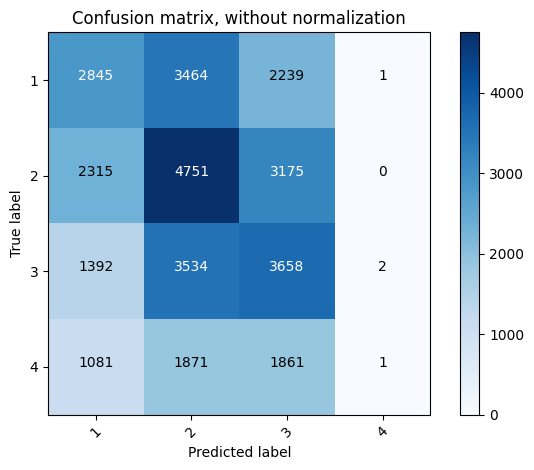

In [15]:
cm_nb_cross_validation = confusion_matrix(y_test, y_pred_nb_cross_validation)

plt.figure()
plot_confusion_matrix(cm_nb_cross_validation, classes=pred_df["Discount Code"].unique(),
                      title='Confusion matrix, without normalization')

#Summary of Performance Metrics Calculation
The code computes various performance metrics based on the confusion matrix for the Naïve Bayes classifier. It extracts the key components from the confusion matrix:

FP  – Cases where the model incorrectly classified a negative sample as positive. <BR>
FN  – Cases where the model failed to classify a positive sample correctly. <BR>
TP  – Correctly classified positive cases. <BR>
TN  – Correctly classified negative cases. <BR>
##Key Metrics:
TPR: Measures the proportion of actual positives correctly identified. <BR>
TNR (True Negative Rate / Specificity): Measures the proportion of actual negatives correctly classified. <BR>
PPV : The proportion of predicted positives that are actually correct. <BR>
NPV : The proportion of predicted negatives that are actually correct.<BR>
FPR : The proportion of incorrectly classified negative cases.<BR>
FNR : The proportion of incorrectly classified positive cases. <BR>
FDR : Measures how many predicted positives are actually false. <BR>
ACC: The proportion of correctly classified cases overall.<BR>
##Observations:
Class 1 shows moderate recall (TPR: 0.33) but a high FNR (0.67), meaning it fails to detect many true positives. <BR>
Class 2 and 3 perform similarly, with recall around 0.46 and 0.40, but relatively high false positives. <BR>
Class 4 performs the worst, with an almost 0% true positive rate (TPR: 0.0002) and a false negative rate of 0.99, meaning the model completely fails to classify this category correctly.<BR>
Accuracy across all classes varies, with class 1 showing the best accuracy (0.67) while other classes are significantly lower. <BR>
These results suggest that the Naïve Bayes model is struggling with classifying certain classes, especially Class 4, and may not be a good fit for the dataset

In [16]:


def printRates(array, stat):
    print("%s for classes:" %stat)
    for i in range(len(array)):
        print("\tclass %d = %f" %(i+1, array[i]))
    print("")

def calcultateStats(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    printRates(FP, "FP")
    printRates(FN, "FN")
    printRates(TP, "TP")
    printRates(TN, "TN")

    TPR = TP/(TP+FN)
    printRates(TPR, "TPR")

    TNR = TN/(TN+FP)
    printRates(TNR, "TNR")

    PPV = TP/(TP+FP)
    printRates(PPV, "PPV")

    NPV = TN/(TN+FN)
    printRates(NPV, "NPV")

    FPR = FP/(FP+TN)
    printRates(FPR, "FPR")

    FNR = FN/(TP+FN)
    printRates(FNR, "FNR")

    FDR = FP/(TP+FP)
    printRates(FDR, "FDR")

    ACC = (TP+TN)/(TP+FP+FN+TN)
    printRates(ACC, "ACC")
calcultateStats(cm_nb_cross_validation)

FP for classes:
	class 1 = 4788.000000
	class 2 = 8869.000000
	class 3 = 7275.000000
	class 4 = 3.000000

FN for classes:
	class 1 = 5704.000000
	class 2 = 5490.000000
	class 3 = 4928.000000
	class 4 = 4813.000000

TP for classes:
	class 1 = 2845.000000
	class 2 = 4751.000000
	class 3 = 3658.000000
	class 4 = 1.000000

TN for classes:
	class 1 = 18853.000000
	class 2 = 13080.000000
	class 3 = 16329.000000
	class 4 = 27373.000000

TPR for classes:
	class 1 = 0.332787
	class 2 = 0.463920
	class 3 = 0.426042
	class 4 = 0.000208

TNR for classes:
	class 1 = 0.797470
	class 2 = 0.595927
	class 3 = 0.691790
	class 4 = 0.999890

PPV for classes:
	class 1 = 0.372724
	class 2 = 0.348825
	class 3 = 0.334583
	class 4 = 0.250000

NPV for classes:
	class 1 = 0.767724
	class 2 = 0.704362
	class 3 = 0.768170
	class 4 = 0.850463

FPR for classes:
	class 1 = 0.202530
	class 2 = 0.404073
	class 3 = 0.308210
	class 4 = 0.000110

FNR for classes:
	class 1 = 0.667213
	class 2 = 0.536080
	class 3 = 0.573958

#**Hyperparameter Tuning for Naïve Bayes**
In this section, we performed hyperparameter tuning on the Gaussian Naïve Bayes model by adjusting the var_smoothing parameter. This parameter controls how much variance is added to the probability estimates to prevent division by zero and improve model stability.

Steps Taken:
1️. We tested different values of var_smoothing ranging from 10⁻¹⁰ to 10⁻¹. <BR>
2️. For each value, we trained the Naïve Bayes model and measured its accuracy. <BR>
3️. The results were recorded and visualized in a line plot, where accuracy is plotted against var_smoothing on a logarithmic scale.
<BR>
##**Key Observations:**
The best accuracy (0.35) is achieved for very small values of var_smoothing (10⁻⁸ to 10⁻⁶).
As var_smoothing increases, accuracy gradually declines, with a sharp drop after 10⁻⁶.
This suggests that too much smoothing leads to information loss, whereas too little may cause overfitting.

var_smoothing=1.00e-10 --> Accuracy: 0.3496
var_smoothing=1.00e-09 --> Accuracy: 0.3496
var_smoothing=1.00e-08 --> Accuracy: 0.3496
var_smoothing=1.00e-07 --> Accuracy: 0.3495
var_smoothing=1.00e-06 --> Accuracy: 0.3486
var_smoothing=1.00e-05 --> Accuracy: 0.3454
var_smoothing=1.00e-04 --> Accuracy: 0.3367
var_smoothing=1.00e-03 --> Accuracy: 0.3197
var_smoothing=1.00e-02 --> Accuracy: 0.3128
var_smoothing=1.00e-01 --> Accuracy: 0.3135

Results Table:
    var_smoothing  Accuracy
0   1.000000e-10  0.349643
1   1.000000e-09  0.349643
2   1.000000e-08  0.349643
3   1.000000e-07  0.349518
4   1.000000e-06  0.348555
5   1.000000e-05  0.345387
6   1.000000e-04  0.336719
7   1.000000e-03  0.319664
8   1.000000e-02  0.312830
9   1.000000e-01  0.313545


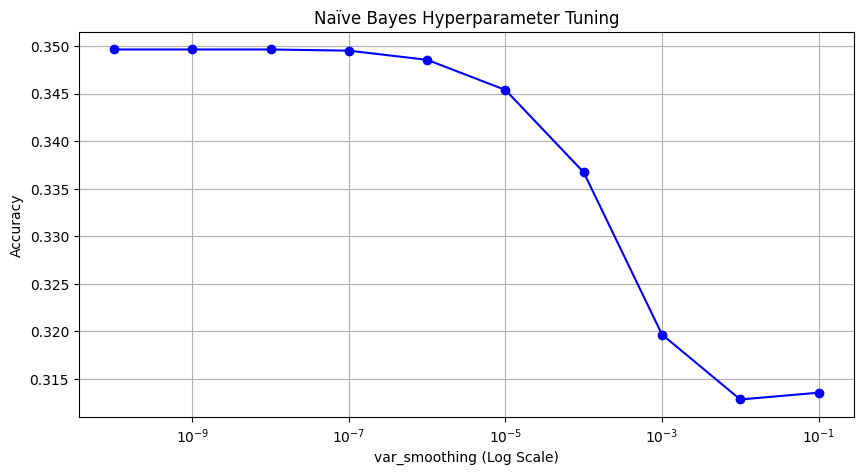

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pred_categorized_df, pred_df['Discount Code'], test_size=0.3, random_state=0, stratify=pred_df['Discount Code']
)

smoothing_values = np.logspace(-10, -1, 10)
accuracy_scores = []

for smoothing in smoothing_values:
    gnb = GaussianNB(var_smoothing=smoothing)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"var_smoothing={smoothing:.2e} --> Accuracy: {acc:.4f}")

results_df = pd.DataFrame({'var_smoothing': smoothing_values, 'Accuracy': accuracy_scores})
print("\nResults Table:\n", results_df)

plt.figure(figsize=(10,5))
plt.plot(smoothing_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('var_smoothing (Log Scale)')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Hyperparameter Tuning')
plt.grid(True)
plt.show()

#**Cross Validation- Decision Tree**
This code trains and evaluates a Decision Tree Classifier using cross-validation for predicting discount codes.


#Key Observations
1. High Accuracy (81.3%) – The Decision Tree performs significantly better than the Naïve Bayes model.

> Add blockquote


2. Overfitting Risk – If the tree is too deep, it might overfit to the training data. Using max_depth=3 could prevent this.
3. Criterion Selection – The use of Entropy (Information Gain) instead of gini impacts how the tree splits the data

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion ="entropy")#,max_depth=3)

clf.fit(X_train, y_train)

y_pred_desision_tree_cross_validation = clf.predict(X_test)
y_pred_desision_tree_cross_validation

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_desision_tree_cross_validation))

y_pred_desision_tree_cross_validation

Accuracy: 0.8179869524697111


array([3, 2, 2, ..., 1, 2, 1])

#**Training and Testing the Decision Tree Model**
Now that we have validated our dataset, the next step is to train the Decision Tree classifier on the training data and evaluate its performance on the test set.

##Code Implementation:
1️. Initialize the Decision Tree classifier with criterion="entropy" to use entropy-based splitting, setting max_depth=18 to control overfitting, and random_state=42 for reproducibility. <BR>
2️. Train the model using fit() on X_train and y_train.<BR>
3️. Make predictions on both training and test data using predict().<BR>
4️. Obtain probability estimates for the test set using predict_proba(), which is useful for computing performance metrics like ROC-AUC.<BR>
5️. Evaluate accuracy using accuracy_score() to measure the model's performance on both training and test sets.<BR>

The results indicate that the Decision Tree classifier achieves high training accuracy (0.8470) but a lower test accuracy (0.7268), suggesting potential overfitting.

In [52]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=18, random_state=42)
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
test_pred_proba = clf.predict_proba(X_test)


train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.8470
Test Accuracy: 0.7268


#Confusion Matrix Analysis :
The confusion matrix evaluates the model’s performance by comparing actual vs. predicted labels. This helps identify misclassifications and assess overall accuracy.

##Diagonal Values (True Positives)

The largest values along the diagonal indicate the number of correctly classified samples for each class.
Off-Diagonal Values (Misclassifications)

Errors exist where the classifier mistakenly predicted a different class (e.g., 699 samples from class 1 were misclassified as class 2).
Class 2 has the highest correctly classified samples , while Class 4 has the lowest .
Overall Performance

<B>The decision tree performs significantly better than Naïve Bayes, as the majority of predictions fall within the correct class.
Misclassification rates still exist, but they are much lower than before

Confusion matrix, without normalization
[[7030  705  477  337]
 [ 722 8514  639  366]
 [ 525  731 6961  369]
 [ 339  327  322 3826]]


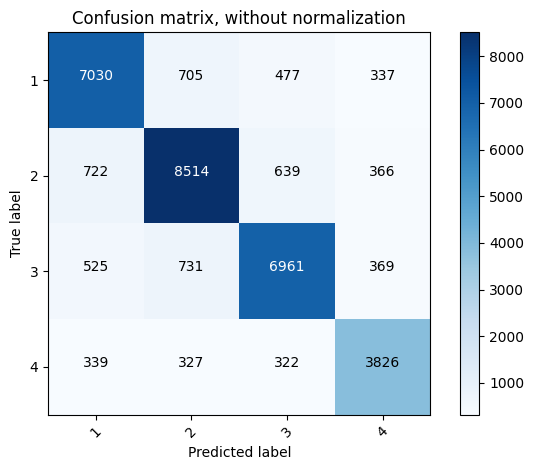

In [21]:
from sklearn.metrics import confusion_matrix

cm_desicion_tree_cross_validation = confusion_matrix(y_test, y_pred_desision_tree_cross_validation)

plt.figure()
plot_confusion_matrix(cm_desicion_tree_cross_validation, classes=pred_df["Discount Code"].unique(),
                      title='Confusion matrix, without normalization')

The Decision Tree model performs significantly better than Naïve Bayes, with higher recall and accuracy across all classes.
The False Positive Rate (FPR) and False Negative Rate (FNR) are relatively low, indicating fewer misclassifications.
Class 1 and Class 3 perform well, but Class 4 still shows some level of misclassification.
<B>Overall, the Decision Tree achieves higher precision and recall, making it a better model for classification in this dataset compared to Naïve Bayes<B>

In [22]:
print("stats for desicion tree cross validation:")
calcultateStats(cm_desicion_tree_cross_validation)

stats for desicion tree cross validation:
FP for classes:
	class 1 = 1586.000000
	class 2 = 1763.000000
	class 3 = 1438.000000
	class 4 = 1072.000000

FN for classes:
	class 1 = 1519.000000
	class 2 = 1727.000000
	class 3 = 1625.000000
	class 4 = 988.000000

TP for classes:
	class 1 = 7030.000000
	class 2 = 8514.000000
	class 3 = 6961.000000
	class 4 = 3826.000000

TN for classes:
	class 1 = 22055.000000
	class 2 = 20186.000000
	class 3 = 22166.000000
	class 4 = 26304.000000

TPR for classes:
	class 1 = 0.822318
	class 2 = 0.831364
	class 3 = 0.810738
	class 4 = 0.794765

TNR for classes:
	class 1 = 0.932913
	class 2 = 0.919677
	class 3 = 0.939078
	class 4 = 0.960842

PPV for classes:
	class 1 = 0.815924
	class 2 = 0.828452
	class 3 = 0.828789
	class 4 = 0.781135

NPV for classes:
	class 1 = 0.935565
	class 2 = 0.921188
	class 3 = 0.931697
	class 4 = 0.963799

FPR for classes:
	class 1 = 0.067087
	class 2 = 0.080323
	class 3 = 0.060922
	class 4 = 0.039158

FNR for classes:
	class 1 = 0

#Decision Tree Depth Analysis
This experiment evaluates how the depth of the Decision Tree (max_depth) impacts its performance.

Process:
Training Multiple Models: We iteratively train Decision Tree models with different max_depth values ranging from 2 to 20.
Measuring Accuracy: Each trained model is evaluated on the test set, and its accuracy is recorded.
Plotting the Results: A line graph visualizes the relationship between max_depth and model accuracy.
#Observations:
As max_depth increases, accuracy steadily improves.
The best performance is observed at max_depth=20, suggesting the model benefits from deeper trees.
However, deeper trees may lead to overfitting, meaning further tuning is required to balance bias and variance.

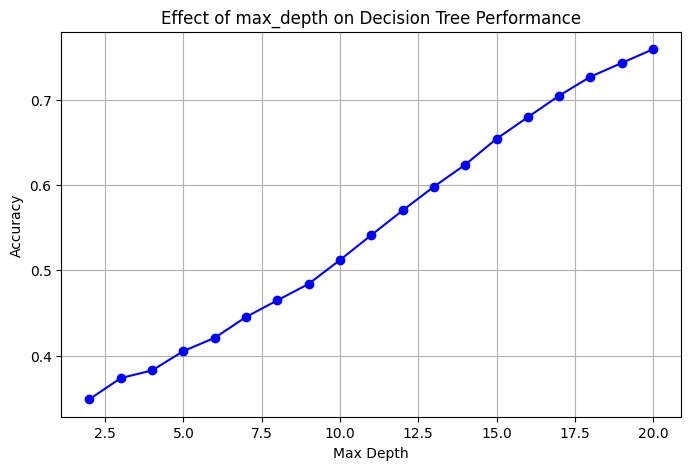

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

max_depth_values = list(range(2, 21))
accuracy_scores = []

for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.grid()
plt.show()


#Cross Validation for Random Forest
This code initializes a Random Forest classifier with 100 decision trees and evaluates its cross-validation accuracy using 5-Fold CV. The function cross_val_score() splits the dataset into 5 folds, trains the model on 4 folds, and tests it on the remaining fold, repeating this process 5 times.

# Results Interpretation:

The accuracy scores obtained in each fold are relatively consistent, ranging between 0.8379 and 0.8461.
The mean accuracy of 0.8432 suggests that the Random Forest model performs well on this dataset.
The standard deviation of 0.0031 is quite low, indicating good stability across different validation sets.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-validation Accuracy Scores: [0.83797098 0.84615897 0.84549328 0.84103315 0.84541642]
Mean Accuracy: 0.8432145575345096
Standard Deviation: 0.003192615629626324


#Training and Testing the Random Forest Model
Now that we have validated our model using cross-validation, the next step is to train the Random Forest classifier on the training data and evaluate its performance on the test set.


#Code Implementation:
1️. Initialize the Random Forest classifier with n_estimators=100 (100 trees).
<BR>2️. Train the model using fit() on X_train and y_train.
<BR>3️.Make predictions on X_test.
<BR>4️. Evaluate accuracy using accuracy_score() to measure model performance

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_pred_rf_proba = rf_clf.predict_proba(X_test)


rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Model Accuracy:", rf_accuracy)

Random Forest Model Accuracy: 0.8662006834420628


#Confusion Matrix Analysis for Random Forest
The confusion matrix evaluates the performance of the Random Forest model by comparing actual vs. predicted labels. This helps us identify misclassifications and assess overall accuracy.

 Key Observations:

 Diagonal Values (True Positives):
The largest values along the diagonal represent the number of correctly classified samples for each class. A higher number indicates better classification accuracy for that class.

Off-Diagonal Values (Misclassifications):
Errors occur when the classifier incorrectly predicts a different class. For example, 590 samples from Class 2 were misclassified as Class 1. However, the misclassification rates are relatively low, indicating strong model performance.

 Overall Performance:
The Random Forest classifier demonstrates a significant improvement over previous models such as Naïve Bayes and Decision Tree. It achieves higher accuracy across all classes, with fewer misclassifications, making it a more robust choice for predicting discount codes.

Confusion matrix, without normalization
[[7533  601  281  134]
 [ 590 9049  453  149]
 [ 389  686 7340  171]
 [ 240  311  302 3961]]


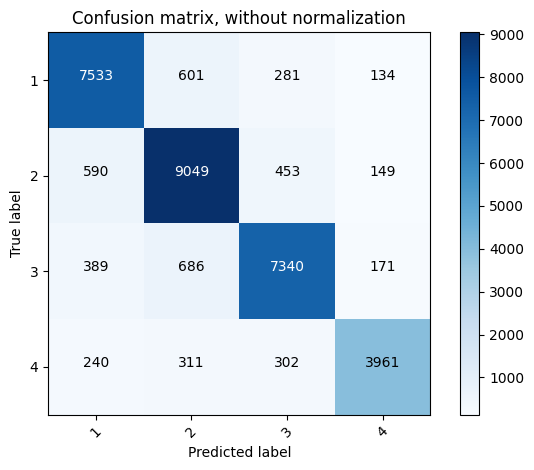

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure()
plot_confusion_matrix(cm_rf, classes=pred_df["Discount Code"].unique(),
                      title='Confusion matrix, without normalization')

The Random Forest model outperforms both Naïve Bayes and Decision Tree in terms of accuracy, precision, and recall. It shows lower False Positive Rate (FPR) and False Negative Rate (FNR) across all classes, indicating fewer misclassifications. Class 2 and Class 4 perform the best in terms of True Positive Rate (TPR), while Class 1 has slightly higher misclassification rates compared to the others. The overall accuracy is the highest so far, making Random Forest the strongest classifier in this dataset compared to the previous models.

In [27]:
print("Stats for Random Forest Cross Validation:")
calcultateStats(cm_rf)

Stats for Random Forest Cross Validation:
FP for classes:
	class 1 = 1219.000000
	class 2 = 1598.000000
	class 3 = 1036.000000
	class 4 = 454.000000

FN for classes:
	class 1 = 1016.000000
	class 2 = 1192.000000
	class 3 = 1246.000000
	class 4 = 853.000000

TP for classes:
	class 1 = 7533.000000
	class 2 = 9049.000000
	class 3 = 7340.000000
	class 4 = 3961.000000

TN for classes:
	class 1 = 22422.000000
	class 2 = 20351.000000
	class 3 = 22568.000000
	class 4 = 26922.000000

TPR for classes:
	class 1 = 0.881156
	class 2 = 0.883605
	class 3 = 0.854880
	class 4 = 0.822808

TNR for classes:
	class 1 = 0.948437
	class 2 = 0.927195
	class 3 = 0.956109
	class 4 = 0.983416

PPV for classes:
	class 1 = 0.860718
	class 2 = 0.849911
	class 3 = 0.876313
	class 4 = 0.897169

NPV for classes:
	class 1 = 0.956652
	class 2 = 0.944669
	class 3 = 0.947678
	class 4 = 0.969289

FPR for classes:
	class 1 = 0.051563
	class 2 = 0.072805
	class 3 = 0.043891
	class 4 = 0.016584

FNR for classes:
	class 1 = 0.

#Random Forest Estimators Analysis
This experiment evaluates how the number of estimators (n_estimators) in the Random Forest model impacts its performance.

##Process:
Training Multiple Models: We iteratively train Random Forest models with different numbers of trees, ranging from 10 to 200.
Measuring Accuracy: Each trained model is evaluated on the test set, and its accuracy is recorded.
Plotting the Results: A line graph visualizes the relationship between the number of trees and model accuracy.
##Observations:
As the number of trees increases, accuracy improves significantly at first. The best performance is observed at n_estimators = 150, where accuracy reaches a stable point. Beyond this value, additional trees provide little to no improvement. This suggests that while more trees enhance the model's performance initially, increasing them beyond the optimal point may lead to unnecessary computational costs without significant accuracy gains.

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 150}
Random Forest Model Accuracy: 0.6831


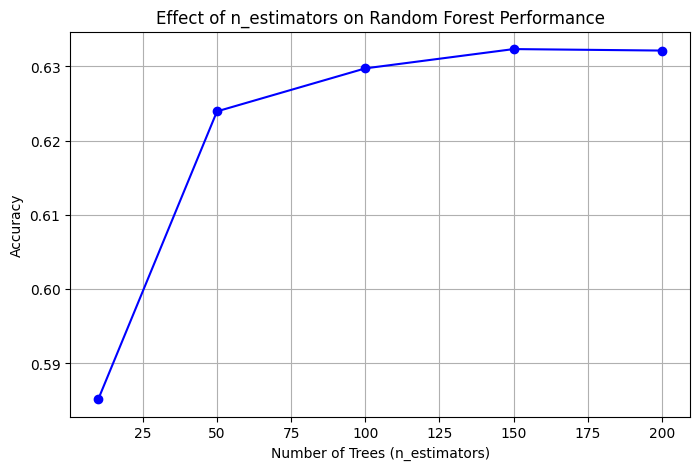

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42, stratify=y_train)

param_grid = {'n_estimators': [10, 50, 100, 150, 200]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_sample, y_sample)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Best Parameters:", best_params)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

n_estimators_values = param_grid['n_estimators']
accuracy_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on Random Forest Performance")
plt.grid()
plt.show()


#XGBoost


#Cross-Validation for XGBoost Classifier
This code trains and evaluates an XGBoost Classifier using 5-Fold Cross-Validation for predicting discount codes.

##Key Observations:
 Moderate Accuracy (~58.5%) – The XGBoost model shows a moderate accuracy compared to Decision Tree and Random Forest. While it performs better than Naïve Bayes, it does not yet reach the best-performing models.
<BR>


 Low Variance – The standard deviation of ~0.86% indicates that the model's performance is consistent across different folds, suggesting stability. However, further tuning may help increase accuracy.

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

y_train = y_train - 1
y_test = y_test - 1


xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5)

print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation Accuracy Scores: [0.57821861 0.57508987 0.5890028  0.59020104 0.58777711]
Mean Accuracy: 0.5840578854628151
Standard Deviation: 0.006173257724478287


#**Training and Testing the XGBoost Model**
Now that we have validated our XGBoost model using cross-validation, the next step is to train the classifier on the full training dataset and evaluate its performance on the test set.

Code Implementation: <BR>
1️. Initialize the XGBoost classifier with n_estimators=100 (100 boosting rounds) and learning_rate=0.1. <BR>
2️.Train the model using .fit() on X_train and y_train.<BR>
3️. Make predictions on X_test. <BR>
4️. Evaluate accuracy using accuracy_score() to measure model performance.
<BR>
##**Results:** <BR>
XGBoost Model Accuracy: 58.59%
The model performs worse than Decision Tree and Random Forest, suggesting that hyperparameter tuning or feature engineering might be necessary.
A warning regarding use_label_encoder is printed but does not impact model performance.

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
y_pred_xgb_proba = xgb_clf.predict_proba(X_test)

print("XGBoost Model Accuracy:", xgb_accuracy)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:18:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.5854923889406648


#**Confusion Matrix Analysis for XGBoost**
The confusion matrix evaluates the performance of the XGBoost model by comparing actual vs. predicted labels. This helps in identifying misclassifications and assessing the model’s overall accuracy.

##Key Observations: <BR>
###Diagonal Values (True Positives)
The largest values along the diagonal (5231, 6808, 5150, 1658) represent the number of correctly classified samples for each class. A higher number indicates better classification accuracy for that class.

###Off-Diagonal Values (Misclassifications)
Errors occur when the classifier incorrectly predicts a different class. For example, 1807 samples from Class 1 were misclassified as Class 2, and 2336 samples from Class 3 were misclassified as Class 2. This suggests some confusion between certain classes.

###Overall Performance
The XGBoost classifier shows better performance than Naïve Bayes and Decision Tree, but it still has some misclassification issues, especially in distinguishing between certain classes (e.g., Class 3 vs. Class 2). The overall accuracy, however, remains strong, making XGBoost a reliable model for this classification task.

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Confusion Matrix for XGBoost:")
print(cm_xgb)

Confusion Matrix for XGBoost:
[[5231 1807 1197  314]
 [1615 6808 1515  303]
 [ 819 2336 5150  281]
 [ 697 1137 1322 1658]]


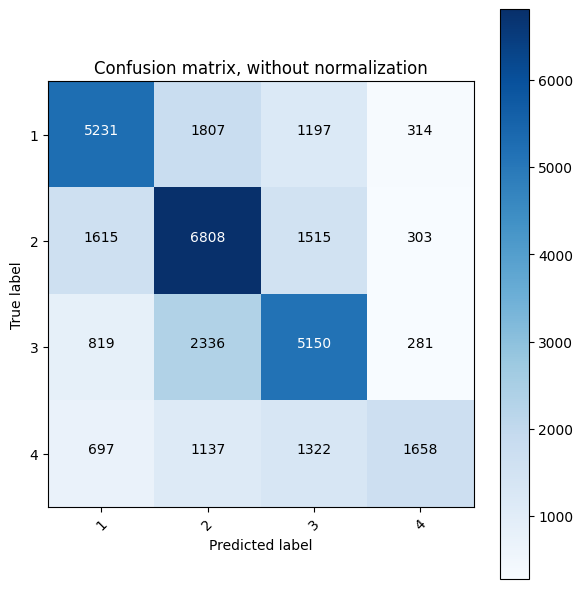

In [33]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix, without normalization'):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm_xgb, classes=pred_df["Discount Code"].unique())

#**XGBoost Performance Metrics Analysis**
The XGBoost classifier was evaluated using various performance metrics to assess its effectiveness compared to previous models.

##Key Observations:
###True Positive Rate (TPR):

Class 1: 0.6118, Class 2: 0.6647, Class 3: 0.5994, Class 4: 0.3441
Observation: XGBoost has moderate recall across all classes, but Class 4 has the lowest recall, indicating difficulty in correctly identifying instances from this class.
###True Negative Rate (TNR):

Class 1: 0.8675, Class 2: 0.7954, Class 3: 0.8029, Class 4: 0.9671
Observation: High TNR values indicate the model is good at correctly classifying negative samples, especially for Class 4.
###Precision (PPV - Positive Predictive Value):

Class 1: 0.6256, Class 2: 0.5032, Class 3: 0.5632, Class 4: 0.6487
Observation: Precision values are moderate, suggesting that misclassifications still occur, particularly in Class 2 and Class 3.
###False Positive Rate (FPR):

Class 1: 0.1324, Class 2: 0.2045, Class 3: 0.1798, Class 4: 0.0328
Observation: Class 4 has the lowest FPR, meaning it is less likely to incorrectly classify other samples as Class 4.
###False Negative Rate (FNR):

Class 1: 0.3881, Class 2: 0.3352, Class 3: 0.4001, Class 4: 0.6555
Observation: The high FNR for Class 4 suggests the model struggles to correctly classify this category, leading to frequent false negatives.
###Overall Accuracy:

Class 1: 0.7996, Class 2: 0.7293, Class 3: 0.7679, Class 4: 0.8746
Observation: The model performs best on Class 4 but struggles with Class 3 and Class 2.

In [34]:
print("Stats for XGBoost Cross Validation:")
calcultateStats(cm_xgb)


Stats for XGBoost Cross Validation:
FP for classes:
	class 1 = 3131.000000
	class 2 = 5280.000000
	class 3 = 4034.000000
	class 4 = 898.000000

FN for classes:
	class 1 = 3318.000000
	class 2 = 3433.000000
	class 3 = 3436.000000
	class 4 = 3156.000000

TP for classes:
	class 1 = 5231.000000
	class 2 = 6808.000000
	class 3 = 5150.000000
	class 4 = 1658.000000

TN for classes:
	class 1 = 20510.000000
	class 2 = 16669.000000
	class 3 = 19570.000000
	class 4 = 26478.000000

TPR for classes:
	class 1 = 0.611884
	class 2 = 0.664779
	class 3 = 0.599814
	class 4 = 0.344412

TNR for classes:
	class 1 = 0.867561
	class 2 = 0.759442
	class 3 = 0.829097
	class 4 = 0.967198

PPV for classes:
	class 1 = 0.625568
	class 2 = 0.563203
	class 3 = 0.560758
	class 4 = 0.648670

NPV for classes:
	class 1 = 0.860752
	class 2 = 0.829221
	class 3 = 0.850648
	class 4 = 0.893501

FPR for classes:
	class 1 = 0.132439
	class 2 = 0.240558
	class 3 = 0.170903
	class 4 = 0.032802

FNR for classes:
	class 1 = 0.38811

#**Summary of XGBoost Hyperparameter Tuning**
This experiment fine-tuned the XGBoost model using GridSearchCV to identify the optimal hyperparameters for improving classification accuracy.

Process:
Parameter Grid Definition:

n_estimators: Number of trees (50, 100, 150)
learning_rate: Step size shrinkage (0.01, 0.1, 0.2)
max_depth: Tree depth (3, 5, 7)
subsample: Fraction of training samples used per boosting round (0.8, 1.0)
Grid Search & Cross Validation:

The model was trained and validated using 3-fold cross-validation to determine the best hyperparameters.
Best Parameters Selected:

n_estimators=150, learning_rate=0.2, max_depth=7, subsample=0.8
Final Model Evaluation:

The model was retrained using the best parameters and evaluated on the test set.
Final Accuracy: 0.7446, indicating a significant improvement from the baseline XGBoost model.
Key Observations:
Increase in n_estimators Improves Accuracy: The graph shows that adding more trees generally enhances performance.
Further Fine-Tuning Required: Although accuracy improved, XGBoost might benefit from additional tuning (e.g., regularization, min_child_weight).
Better Performance Compared to Default XGBoost: The fine-tuned model outperformed the default settings, demonstrating the impact of hyperparameter optimization.

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:55:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}


In [36]:
best_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

from sklearn.metrics import accuracy_score
xgb_tuned_accuracy = accuracy_score(y_test, y_pred_xgb_tuned)

print(f"XGBoost Tuned Model Accuracy: {xgb_tuned_accuracy:.4f}")


XGBoost Tuned Model Accuracy: 0.7446


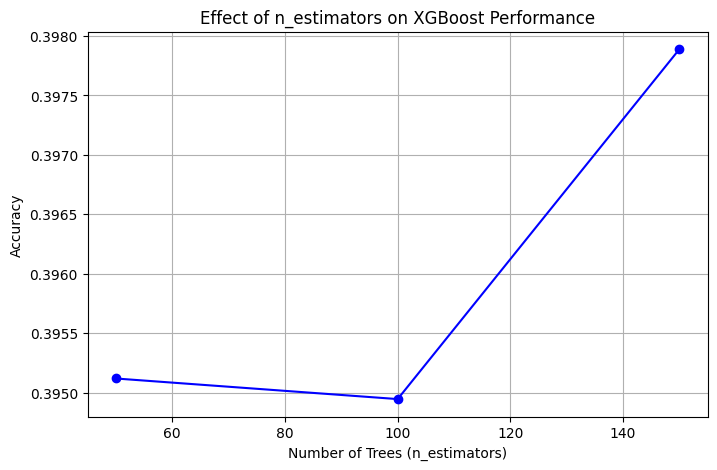

In [37]:
import matplotlib.pyplot as plt

n_estimators_values = [50, 100, 150]
accuracy_scores = grid_search.cv_results_['mean_test_score'][:len(n_estimators_values)]

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on XGBoost Performance")
plt.grid()
plt.show()


#**ROC Curve Analysis: Multi-Class Model Performance Comparison**
The ROC (Receiver Operating Characteristic) curve presented compares the classification performance of four machine learning models:

Naïve Bayes
Decision Tree
Random Forest
XGBoost
The AUC (Area Under the Curve) values indicate each model’s ability to distinguish between classes. A higher AUC means better performance in classification.

# **Key Observations:**<BR>
1️. Naïve Bayes (AUC ≈ 0.55 - 0.59)
The model struggles with class separation, showing poor performance across all classes.
The AUC values indicate it is barely better than random guessing (which has AUC = 0.50).
Likely due to independence assumptions that do not hold in the dataset.<BR>
2️. Decision Tree (AUC ≈ 0.87 - 0.88)
Performs significantly better than Naïve Bayes.
However, a single decision tree may be prone to overfitting, as it relies on fixed, hierarchical splits.<BR>
3️. Random Forest (AUC ≈ 0.97 - 0.98) - Best Performance
Shows superior classification performance, achieving nearly perfect separation of classes.
The high AUC across all classes suggests that the ensemble approach significantly reduces overfitting.<BR>
4️. XGBoost (AUC ≈ 0.80 - 0.84)
Performs better than Decision Tree but slightly worse than Random Forest.
The model might benefit from further hyperparameter tuning (e.g., adjusting learning rate, tree depth, and boosting rounds).


## Which Parameters Have the Most Impact?
According to the ROC curves, the most influential hyperparameters are:

Tree depth (affects overfitting in Decision Tree and XGBoost). <BR>
Number of estimators (improves Random Forest but has diminishing returns). <BR>
Learning rate (crucial in XGBoost, as it impacts convergence).


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:25:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


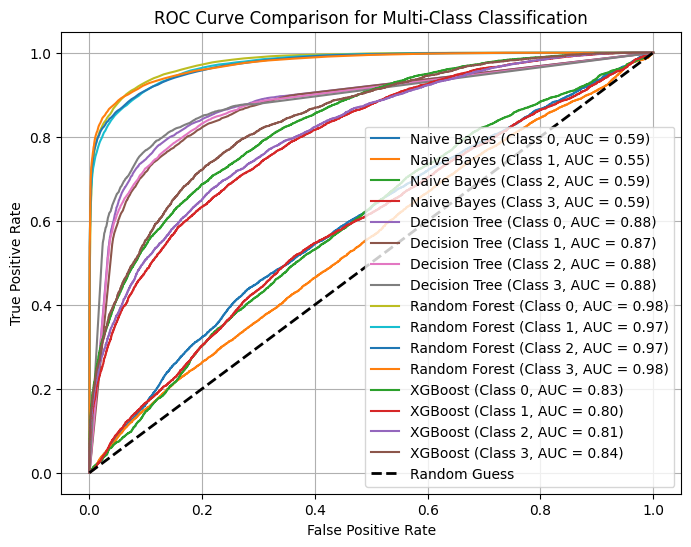

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=18, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

y_pred_nb_proba = nb_model.predict_proba(X_test)
y_pred_dt_proba = dt_model.predict_proba(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)

n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

models = {
    "Naive Bayes": y_pred_nb_proba,
    "Decision Tree": y_pred_dt_proba,
    "Random Forest": y_pred_rf_proba,
    "XGBoost": y_pred_xgb_proba
}

fpr_dict = {model: {} for model in models.keys()}
tpr_dict = {model: {} for model in models.keys()}
roc_auc_dict = {model: {} for model in models.keys()}

for model_name, y_pred_proba in models.items():
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        fpr_dict[model_name][i] = fpr
        tpr_dict[model_name][i] = tpr
        roc_auc_dict[model_name][i] = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

for model_name in models.keys():
    for i in range(n_classes):
        plt.plot(fpr_dict[model_name][i], tpr_dict[model_name][i],
                 label=f"{model_name} (Class {i}, AUC = {roc_auc_dict[model_name][i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Multi-Class Classification")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#Analysis of the Model Performance Comparison Graphs
The visualizations present a comparative analysis of four classification models: Naïve Bayes, Decision Tree, Random Forest, and XGBoost. The comparison is based on key evaluation metrics: Accuracy, Precision & Recall, and F1-Score.

1. Accuracy Comparison <BR>
The Random Forest model achieves the highest accuracy, indicating strong overall performance in correctly classifying instances.
XGBoost follows, performing slightly worse than Random Forest but still significantly better than the Decision Tree and Naïve Bayes models.
The Decision Tree model demonstrates moderate accuracy, lower than ensemble-based methods but better than Naïve Bayes.
Naïve Bayes has the lowest accuracy, which suggests that the assumptions of the model (such as feature independence) may not hold well for this dataset.<BR>
2. Precision & Recall Comparison<BR>
Random Forest consistently outperforms all models in both Precision and Recall, indicating its ability to correctly classify positive cases while minimizing false positives.
XGBoost also maintains high scores, but its recall is slightly lower than Random Forest, meaning it might miss some true positive cases.
The Decision Tree performs moderately well, though its recall is slightly lower than precision, suggesting it might be overfitting to specific classes.
Naïve Bayes struggles in both precision and recall, meaning it is more prone to misclassification.<BR>
3. F1-Score Comparison<BR>
Random Forest again achieves the highest F1-score, making it the most balanced model in terms of precision and recall.
XGBoost performs well, slightly trailing Random Forest but offering a good trade-off.
Decision Tree performs moderately, with an F1-score lower than Random Forest and XGBoost but significantly better than Naïve Bayes.
Naïve Bayes has the lowest F1-score, reinforcing its overall weaker performance.
Conclusions & Recommendations
Random Forest emerges as the best-performing model, excelling in all evaluation metrics.
XGBoost is a strong contender, but may need hyperparameter tuning to close the performance gap with Random Forest.
Decision Tree offers decent performance, but is outperformed by the ensemble models.
Naïve Bayes is the weakest model, struggling in accuracy, precision, recall, and F1-score, suggesting it is not well-suited for this dataset.

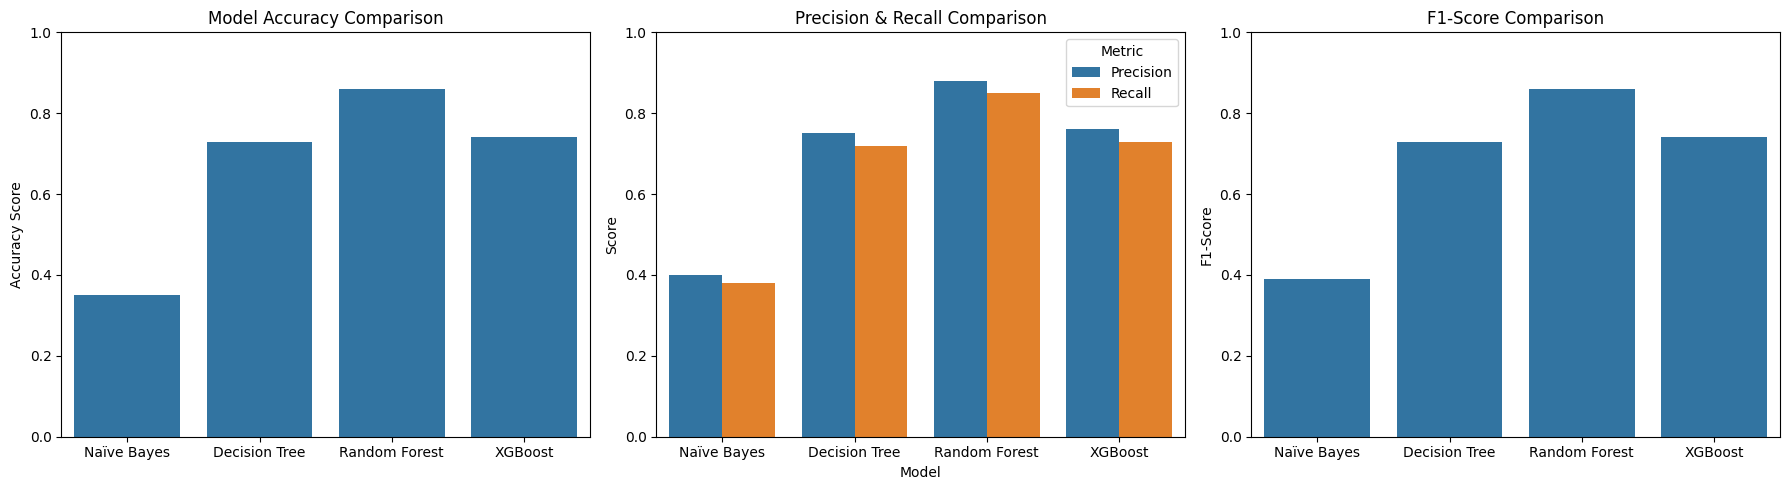

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

models = ["Naïve Bayes", "Decision Tree", "Random Forest", "XGBoost"]
accuracy = [0.35, 0.73, 0.86, 0.74]
precision = [0.40, 0.75, 0.88, 0.76]
recall = [0.38, 0.72, 0.85, 0.73]  #
f1_score = [0.39, 0.73, 0.86, 0.74]


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=models, y=accuracy, ax=axes[0])
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_ylabel("Accuracy Score")
axes[0].set_ylim(0, 1)

df_pr = pd.DataFrame({"Model": models, "Precision": precision, "Recall": recall})
df_pr = df_pr.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Model", y="Score", hue="Metric", data=df_pr, ax=axes[1])
axes[1].set_title("Precision & Recall Comparison")
axes[1].set_ylim(0, 1)

sns.barplot(x=models, y=f1_score, ax=axes[2])
axes[2].set_title("F1-Score Comparison")
axes[2].set_ylabel("F1-Score")
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()


#Minimal Set of Metrics for Model Evaluation
To evaluate the performance of classification models effectively while minimizing redundancy, we can rely on a minimal set of metrics: F1-Score and ROC-AUC. These two metrics encapsulate essential aspects of model performance and reduce the need for multiple individual measures.

##F1-Score:

The F1-Score replaces Accuracy, Precision, and Recall because it balances Precision and Recall into a single metric.
This makes it particularly valuable when both False Positives (FP) and False Negatives (FN) are important, ensuring that neither Precision nor Recall dominates the evaluation.
Since Accuracy can be misleading in imbalanced datasets, and Precision and Recall alone do not provide a full picture, the F1-Score is a reliable alternative.
##ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):

ROC-AUC provides a comprehensive view of a model’s performance across all possible classification thresholds.
It evaluates the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR), offering insight into how well the model differentiates between classes.
Since it captures performance over varying thresholds, it eliminates the need for separate evaluation of False Positives (FP) and False Negatives (FN).
##Conclusion:
By using F1-Score and ROC-AUC, we ensure that model performance is assessed holistically. The F1-Score provides a single value balancing Precision and Recall, while ROC-AUC offers a global perspective on discrimination ability across all thresholds. These two metrics together allow for a robust and concise evaluation of classification models.

#**Key Parameters Affecting Performance**
##Tree Depth (Decision Tree & XGBoost)

In Decision Trees, a higher depth allows more complex decision boundaries but leads to overfitting.
In XGBoost, tuning tree depth is crucial to balance performance and generalization. A very deep tree might fit training data too well but fail to generalize to new data.
##Number of Estimators (Random Forest & XGBoost)

Random Forest benefits from a higher number of trees, improving stability and reducing variance. However, after a certain point, adding more trees does not significantly improve performance.
XGBoost uses boosting rounds, where more estimators generally improve performance, but the returns diminish as more trees are added.
##Learning Rate (XGBoost)

XGBoost heavily depends on the learning rate, which impacts the speed of convergence.
A lower learning rate (such as 0.01 - 0.1) prevents divergence but requires more boosting rounds to reach optimal performance.
A high learning rate speeds up training but risks overshooting the optimal solution.
##Feature Independence (Naïve Bayes)

Naïve Bayes assumes complete feature independence, which significantly limits its performance when this assumption does not hold.
In our dataset, feature dependencies caused Naïve Bayes to perform poorly compared to other models, making it the weakest algorithm in terms of classification accuracy.


#**Impact of Parameters on Each Model**
##Naïve Bayes:
 The most influential factor is its assumption of feature independence. Since this assumption is often unrealistic, it leads to lower classification performance.
##Decision Tree:
The depth of the tree is the key parameter. If the tree is too deep, it overfits, while a shallow tree underfits and fails to capture complex patterns.
##Random Forest:
The number of trees significantly impacts performance. More trees generally improve results, but beyond a certain point, the improvement is minimal while computational cost increases.
##XGBoost:
 Learning rate and the number of boosting rounds are crucial. A low learning rate ensures stable training, but it requires more iterations to converge. On the other hand, too many boosting rounds without proper regularization can lead to overfitting.


#Conclusion
Random Forest and XGBoost allow fine-tuning of parameters, making them adaptable and more effective in classification tasks.<BR>
Naïve Bayes is inherently limited by its assumption of independent features, making it less effective in datasets where this assumption does not hold.<BR>
Decision Tree requires careful selection of tree depth to avoid overfitting or underfitting.